In [53]:
import pandas as pd
import numpy as np

<h1><strong>====================================<br>Requests dos dados de segurança<strong></h1>

In [54]:
import requests
url='https://forumseguranca.org.br/wp-content/uploads/2018/05/ANUARIO_13_Retificado_21_10_19.xlsx'
path = requests.get(url)
open("anuario13.xlsx", "wb").write(path.content)

1175015

In [55]:
gastos13 = pd.read_excel("anuario13.xlsx", sheet_name="T46")
gastos13 = gastos13.drop([0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 24, 25, 26, 27, 29, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47])
gastos13 = gastos13.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Unnamed: 12', '(Voltar ao índice)'])
gastos13

,TABELA 46,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14
3,União e Unidades da Federação,Policiamento,NaN,Defesa Civil,NaN,Informação e Inteligência,NaN,Demais subfunções,NaN,Total,NaN
4,NaN,2017,2018.00,2017,2018,2017,2018,2017,2018,2017,2018.00
15,Alagoas,829155596.08,800805984.28,23037726.80,24893.37,9372233.33,8973,300834639.65,367826835.46,1162400195.87,1168666686.11
18,Bahia,370464917.44,304251340.07,17255225.22,28102381.25,-,9021953.06,3879866671.15,3956053691.52,4267586813.81,4297429365.90
19,Ceará,241443848.14,185077508.93,21313148.73,28654156.67,-,-,1979098777.84,2367269357.53,2241855774.72,2581001023.13
23,Maranhão (1),269545102.35,338119610.25,8531014.69,8761897.20,11021598.49,-,1359240985.19,1502765887.11,1648338700.72,1849647394.56
28,Paraíba,6548725.56,3356030.31,4666135.94,6433227.88,206036.48,156283.90,1198321962.22,1253750434.60,1209742860.21,1263695976.69
30,Pernambuco,2019710653.13,2343900221.30,273621055.83,235533504.40,1374866.07,495750.36,327890090.26,195245921.24,2622596665.29,2775175397.30
31,Piauí,48783766.21,79099994.36,32190979.06,31777065.08,2560.52,-,659675084.00,635401471.15,740652389.79,746278530.59
33,Rio Grande do Norte,519311823.69,555180592.81,4717074.58,8421124.26,46362329.39,-,348042235.86,413132039.90,918433463.52,976733756.97


<h1><strong>=================================<br>correção das colunas dados 2017 à 2018<strong></h1>

In [56]:
gastos13 = gastos13.rename({'TABELA 46':'Unidades da Federação', 'Unnamed: 1': 'Policiamento 2017', 'Unnamed: 2':'Policiamento 2018', 'Unnamed: 4':'Defesa Civil 2017',	'Unnamed: 5':'Defesa Civil 2018', 'Unnamed: 7':'Informação e Inteligência 2017', 'Unnamed: 8':'Informação e Inteligência 2018', 'Unnamed: 10':'Outros 2017', 'Unnamed: 11':'Outros 2018', 'Unnamed: 13':'Total 2017', 'Unnamed: 14':'Total 2018'}, axis='columns')
gastos13 = gastos13.drop([3,4])
gastos13['Unidades da Federação'][23] = 'Maranhão'
gastos13

<ipython-input-56-363e8dd747a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gastos13['Unidades da Federação'][23] = 'Maranhão'


,Unidades da Federação,Policiamento 2017,Policiamento 2018,Defesa Civil 2017,Defesa Civil 2018,Informação e Inteligência 2017,Informação e Inteligência 2018,Outros 2017,Outros 2018,Total 2017,Total 2018
15,Alagoas,829155596.08,800805984.28,23037726.80,24893.37,9372233.33,8973,300834639.65,367826835.46,1162400195.87,1168666686.11
18,Bahia,370464917.44,304251340.07,17255225.22,28102381.25,-,9021953.06,3879866671.15,3956053691.52,4267586813.81,4297429365.90
19,Ceará,241443848.14,185077508.93,21313148.73,28654156.67,-,-,1979098777.84,2367269357.53,2241855774.72,2581001023.13
23,Maranhão,269545102.35,338119610.25,8531014.69,8761897.20,11021598.49,-,1359240985.19,1502765887.11,1648338700.72,1849647394.56
28,Paraíba,6548725.56,3356030.31,4666135.94,6433227.88,206036.48,156283.90,1198321962.22,1253750434.60,1209742860.21,1263695976.69
30,Pernambuco,2019710653.13,2343900221.30,273621055.83,235533504.40,1374866.07,495750.36,327890090.26,195245921.24,2622596665.29,2775175397.30
31,Piauí,48783766.21,79099994.36,32190979.06,31777065.08,2560.52,-,659675084.00,635401471.15,740652389.79,746278530.59
33,Rio Grande do Norte,519311823.69,555180592.81,4717074.58,8421124.26,46362329.39,-,348042235.86,413132039.90,918433463.52,976733756.97
39,Sergipe,439674076.29,453472593.33,58737154.77,62741382.40,-,-,378162628.57,376772210.38,876573859.63,892986186.11


In [58]:
gastos13 = gastos13.replace({"-": "0"})
#transformação de dados ausentes

In [59]:
#conversão de dados numéricos para float
gastos13['Informação e Inteligência 2017'] = pd.to_numeric(gastos13['Informação e Inteligência 2017'])
gastos13['Informação e Inteligência 2018'] = pd.to_numeric(gastos13['Informação e Inteligência 2018'])
gastos13['Policiamento 2017'] = gastos13['Policiamento 2017'].astype('float64')
gastos13['Defesa Civil 2017'] = gastos13['Defesa Civil 2017'].astype('float64')
gastos13['Defesa Civil 2018'] = gastos13['Defesa Civil 2018'].astype('float64')
gastos13['Outros 2017'] = gastos13['Outros 2017'].astype('float64')
gastos13['Outros 2018'] = gastos13['Outros 2018'].astype('float64')
gastos13['Total 2017'] = gastos13['Total 2017'].astype('float64')
gastos13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 15 to 39
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unidades da Federação           9 non-null      object 
 1   Policiamento 2017               9 non-null      float64
 2   Policiamento 2018               9 non-null      float64
 3   Defesa Civil 2017               9 non-null      float64
 4   Defesa Civil 2018               9 non-null      float64
 5   Informação e Inteligência 2017  9 non-null      float64
 6   Informação e Inteligência 2018  9 non-null      float64
 7   Outros 2017                     9 non-null      float64
 8   Outros 2018                     9 non-null      float64
 9   Total 2017                      9 non-null      float64
 10  Total 2018                      9 non-null      float64
dtypes: float64(10), object(1)
memory usage: 1.1+ KB


In [60]:
#correção de indices do dataframe
pd.set_option('float_format', '{:.2f}'.format)
gastos13 = gastos13.set_index('Unidades da Federação')
gastos13

,Policiamento 2017,Policiamento 2018,Defesa Civil 2017,Defesa Civil 2018,Informação e Inteligência 2017,Informação e Inteligência 2018,Outros 2017,Outros 2018,Total 2017,Total 2018
Unidades da Federação,,,,,,,,,,
Alagoas,829155596.08,800805984.28,23037726.80,24893.37,9372233.33,8973.00,300834639.65,367826835.46,1162400195.87,1168666686.11
Bahia,370464917.44,304251340.07,17255225.22,28102381.25,0.00,9021953.06,3879866671.15,3956053691.52,4267586813.81,4297429365.90
Ceará,241443848.14,185077508.93,21313148.73,28654156.67,0.00,0.00,1979098777.84,2367269357.53,2241855774.72,2581001023.13
Maranhão,269545102.35,338119610.25,8531014.69,8761897.20,11021598.49,0.00,1359240985.19,1502765887.11,1648338700.72,1849647394.56
Paraíba,6548725.56,3356030.31,4666135.94,6433227.88,206036.48,156283.90,1198321962.22,1253750434.60,1209742860.21,1263695976.69
Pernambuco,2019710653.13,2343900221.30,273621055.83,235533504.40,1374866.07,495750.36,327890090.26,195245921.24,2622596665.29,2775175397.30
Piauí,48783766.21,79099994.36,32190979.06,31777065.08,2560.52,0.00,659675084.00,635401471.15,740652389.79,746278530.59
Rio Grande do Norte,519311823.69,555180592.81,4717074.58,8421124.26,46362329.39,0.00,348042235.86,413132039.90,918433463.52,976733756.97
Sergipe,439674076.29,453472593.33,58737154.77,62741382.40,0.00,0.00,378162628.57,376772210.38,876573859.63,892986186.11


<h1><strong>==========================<br>Request de dados 2019 a 2020<strong></h1>

In [61]:
url='https://forumseguranca.org.br/wp-content/uploads/2021/10/anuario-15-completo-v6-251021.xlsx'
path = requests.get(url)
open("anuario15.xlsx", "wb").write(path.content)

8062005

In [62]:
gastos15 = pd.read_excel("anuario15.xlsx", sheet_name="T54")
gastos15 = gastos15.drop([0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 24, 25, 26, 27, 29, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46])
gastos15 = gastos15.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Unnamed: 12', '(Voltar ao índice)'])
gastos15

,TABELA 54,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14
3,União e Unidades da Federação,Policiamento,NaN,Defesa Civil,NaN,Informação e Inteligência,NaN,Demais subfunções,NaN,Total,NaN
4,NaN,2019,2020.00,2019,2020.00,2019,2020.00,2019,2020.00,2019,2020.00
15,Alagoas,39933161.56,59775502.63,3463069.32,8614589.87,633890.30,62442.59,1115128698.11,1286533736.01,1159158819.29,1354986271.10
18,Bahia,298957510.04,232915902.13,55709611.15,23393352.95,14649267.91,9378921.46,4313086966.67,4055975150.69,4682403355.77,4321663327.23
19,Ceará,272982780.31,158644003.31,4349594.60,3812430.40,54786132.51,53546444.02,2510241286.32,2829579791.26,2842359793.74,3045582668.99
23,Maranhão,355185331.79,0.00,5658886.65,12371118.58,0,0.00,1642815577.65,1942012656.85,2003659796.09,1954383775.43
28,Paraíba,7144027.40,7739853.66,9969071.16,8184933.00,195353.34,45850.00,1368931998.14,1401621066.99,1386240450.05,1417591703.65
30,Pernambuco,2514846376.41,2422625614.48,278987021.24,276950156.50,510889.99,880876.40,190800999.53,179694688.39,2985145287.17,2880151335.77
31,Piauí,65786996.90,66549744.65,17542350.13,33279756.35,0,0.00,809966595.34,686002281.84,893295942.37,785831782.84
33,Rio Grande do Norte,709734791.71,53270297.38,9347126.26,6937753.55,0,0.00,484602145.08,978010342.96,1203684063.05,1038218393.89


In [63]:
#correção de colunas de 2019 a 2020
gastos15 = gastos15.rename({'TABELA 54':'Unidades da Federação', 'Unnamed: 1': 'Policiamento 2019', 'Unnamed: 2':'Policiamento 2020', 'Unnamed: 4':'Defesa Civil 2019',	'Unnamed: 5':'Defesa Civil 2020', 'Unnamed: 7':'Informação e Inteligência 2019', 'Unnamed: 8':'Informação e Inteligência 2020', 'Unnamed: 10':'Outros 2019', 'Unnamed: 11':'Outros 2020', 'Unnamed: 13':'Total 2019', 'Unnamed: 14':'Total 2020'}, axis='columns')
gastos15 = gastos15.drop([3,4])
gastos15

,Unidades da Federação,Policiamento 2019,Policiamento 2020,Defesa Civil 2019,Defesa Civil 2020,Informação e Inteligência 2019,Informação e Inteligência 2020,Outros 2019,Outros 2020,Total 2019,Total 2020
15,Alagoas,39933161.56,59775502.63,3463069.32,8614589.87,633890.30,62442.59,1115128698.11,1286533736.01,1159158819.29,1354986271.10
18,Bahia,298957510.04,232915902.13,55709611.15,23393352.95,14649267.91,9378921.46,4313086966.67,4055975150.69,4682403355.77,4321663327.23
19,Ceará,272982780.31,158644003.31,4349594.60,3812430.40,54786132.51,53546444.02,2510241286.32,2829579791.26,2842359793.74,3045582668.99
23,Maranhão,355185331.79,0.00,5658886.65,12371118.58,0,0.00,1642815577.65,1942012656.85,2003659796.09,1954383775.43
28,Paraíba,7144027.40,7739853.66,9969071.16,8184933.00,195353.34,45850.00,1368931998.14,1401621066.99,1386240450.05,1417591703.65
30,Pernambuco,2514846376.41,2422625614.48,278987021.24,276950156.50,510889.99,880876.40,190800999.53,179694688.39,2985145287.17,2880151335.77
31,Piauí,65786996.90,66549744.65,17542350.13,33279756.35,0,0.00,809966595.34,686002281.84,893295942.37,785831782.84
33,Rio Grande do Norte,709734791.71,53270297.38,9347126.26,6937753.55,0,0.00,484602145.08,978010342.96,1203684063.05,1038218393.89
39,Sergipe,525870475.11,505707842.59,75574386.42,74848742.21,1136952.45,1118825.50,386546579.45,375108993.83,989128393.43,956784404.13


In [65]:
#conversão de dados numéricos para float
gastos15['Informação e Inteligência 2019'] = gastos15['Informação e Inteligência 2019'].astype('float64')
gastos15['Policiamento 2019'] = gastos15['Policiamento 2019'].astype('float64')
gastos15['Defesa Civil 2019'] = gastos15['Defesa Civil 2019'].astype('float64')
gastos15['Outros 2019'] = gastos15['Outros 2019'].astype('float64')
gastos15['Total 2019'] = gastos15['Total 2019'].astype('float64')
gastos15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 15 to 39
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unidades da Federação           9 non-null      object 
 1   Policiamento 2019               9 non-null      float64
 2   Policiamento 2020               9 non-null      float64
 3   Defesa Civil 2019               9 non-null      float64
 4   Defesa Civil 2020               9 non-null      float64
 5   Informação e Inteligência 2019  9 non-null      float64
 6   Informação e Inteligência 2020  9 non-null      float64
 7   Outros 2019                     9 non-null      float64
 8   Outros 2020                     9 non-null      float64
 9   Total 2019                      9 non-null      float64
 10  Total 2020                      9 non-null      float64
dtypes: float64(10), object(1)
memory usage: 864.0+ bytes


In [66]:
#correção de indíce
pd.set_option('float_format', '{:.2f}'.format)
gastos15 = gastos15.set_index('Unidades da Federação')
gastos15

,Policiamento 2019,Policiamento 2020,Defesa Civil 2019,Defesa Civil 2020,Informação e Inteligência 2019,Informação e Inteligência 2020,Outros 2019,Outros 2020,Total 2019,Total 2020
Unidades da Federação,,,,,,,,,,
Alagoas,39933161.56,59775502.63,3463069.32,8614589.87,633890.30,62442.59,1115128698.11,1286533736.01,1159158819.29,1354986271.10
Bahia,298957510.04,232915902.13,55709611.15,23393352.95,14649267.91,9378921.46,4313086966.67,4055975150.69,4682403355.77,4321663327.23
Ceará,272982780.31,158644003.31,4349594.60,3812430.40,54786132.51,53546444.02,2510241286.32,2829579791.26,2842359793.74,3045582668.99
Maranhão,355185331.79,0.00,5658886.65,12371118.58,0.00,0.00,1642815577.65,1942012656.85,2003659796.09,1954383775.43
Paraíba,7144027.40,7739853.66,9969071.16,8184933.00,195353.34,45850.00,1368931998.14,1401621066.99,1386240450.05,1417591703.65
Pernambuco,2514846376.41,2422625614.48,278987021.24,276950156.50,510889.99,880876.40,190800999.53,179694688.39,2985145287.17,2880151335.77
Piauí,65786996.90,66549744.65,17542350.13,33279756.35,0.00,0.00,809966595.34,686002281.84,893295942.37,785831782.84
Rio Grande do Norte,709734791.71,53270297.38,9347126.26,6937753.55,0.00,0.00,484602145.08,978010342.96,1203684063.05,1038218393.89
Sergipe,525870475.11,505707842.59,75574386.42,74848742.21,1136952.45,1118825.50,386546579.45,375108993.83,989128393.43,956784404.13


<h1><strong>=======================<br>requests dos dados de 2021<strong></h1>

In [70]:
import requests
url='https://forumseguranca.org.br/wp-content/uploads/2022/06/anuario-2022.xlsx'
path = requests.get(url)
open("anuario16.xlsx", "wb").write(path.content)

7771451

In [71]:
gastos16 = pd.read_excel("anuario16.xlsx", sheet_name="T73")
gastos16 = gastos16.drop([0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 24, 25, 26, 27, 29, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48])
gastos16 = gastos16.drop(columns=['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 13', '(Voltar ao índice)'])
gastos16

,TABELA 73,Unnamed: 2,Unnamed: 5,Unnamed: 8,Unnamed: 11,Unnamed: 14
3,União e Unidades da Federação,NaN,NaN,NaN,NaN,NaN
4,NaN,2021.00,2021,2021,2021.00,2021.00
15,Alagoas,137085570.33,227163.52,12057.64,1275975768.94,1413300560.43
18,Bahia,341433149.32,45880896.58,15707646.15,3965408902.57,4368430594.62
19,Ceará,186998212.56,7945159.97,88674144.18,3052166070.28,3335783586.99
23,Maranhão,157398627.39,12296501.51,...,1810749128.56,1980444257.46
28,Paraíba,14312816.39,13262816.70,192671.86,1437694912.06,1465463217.01
30,Pernambuco,2445971242.15,251766617.39,917758.71,185942567.27,2884598185.52
31,Piauí,91417461.05,33438605.93,...,717604470.60,842460537.58
33,Rio Grande do Norte,50514105.70,18100896.16,...,1162825098.58,1231440100.44


In [72]:
#correção de colunas
gastos16 = gastos16.rename({'TABELA 73':'Unidades da Federação', 'Unnamed: 2':'Policiamento 2021', 'Unnamed: 5':'Defesa Civil 2021', 'Unnamed: 8':'Informação e Inteligência 2021', 'Unnamed: 11':'Outros 2021', 'Unnamed: 14':'Total 2021'}, axis='columns')
gastos16 = gastos16.drop([3,4])
gastos16

,Unidades da Federação,Policiamento 2021,Defesa Civil 2021,Informação e Inteligência 2021,Outros 2021,Total 2021
15,Alagoas,137085570.33,227163.52,12057.64,1275975768.94,1413300560.43
18,Bahia,341433149.32,45880896.58,15707646.15,3965408902.57,4368430594.62
19,Ceará,186998212.56,7945159.97,88674144.18,3052166070.28,3335783586.99
23,Maranhão,157398627.39,12296501.51,...,1810749128.56,1980444257.46
28,Paraíba,14312816.39,13262816.70,192671.86,1437694912.06,1465463217.01
30,Pernambuco,2445971242.15,251766617.39,917758.71,185942567.27,2884598185.52
31,Piauí,91417461.05,33438605.93,...,717604470.60,842460537.58
33,Rio Grande do Norte,50514105.70,18100896.16,...,1162825098.58,1231440100.44
39,Sergipe,973044992.40,131905798.81,6670077.87,415536055.60,1527156924.68


In [74]:
#conversão de dados numéricos para float
gastos16 = gastos16.replace({"...": "0"})
gastos16['Informação e Inteligência 2021'] = gastos16['Informação e Inteligência 2021'].astype('float64')
gastos16['Defesa Civil 2021'] = gastos16['Defesa Civil 2021'].astype('float64')
gastos16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 15 to 39
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unidades da Federação           9 non-null      object 
 1   Policiamento 2021               9 non-null      float64
 2   Defesa Civil 2021               9 non-null      float64
 3   Informação e Inteligência 2021  9 non-null      float64
 4   Outros 2021                     9 non-null      float64
 5   Total 2021                      9 non-null      float64
dtypes: float64(5), object(1)
memory usage: 504.0+ bytes


In [75]:
#correção de indíce
pd.set_option('float_format', '{:.2f}'.format)
gastos16 = gastos16.set_index('Unidades da Federação')
gastos16

,Policiamento 2021,Defesa Civil 2021,Informação e Inteligência 2021,Outros 2021,Total 2021
Unidades da Federação,,,,,
Alagoas,137085570.33,227163.52,12057.64,1275975768.94,1413300560.43
Bahia,341433149.32,45880896.58,15707646.15,3965408902.57,4368430594.62
Ceará,186998212.56,7945159.97,88674144.18,3052166070.28,3335783586.99
Maranhão,157398627.39,12296501.51,0.00,1810749128.56,1980444257.46
Paraíba,14312816.39,13262816.70,192671.86,1437694912.06,1465463217.01
Pernambuco,2445971242.15,251766617.39,917758.71,185942567.27,2884598185.52
Piauí,91417461.05,33438605.93,0.00,717604470.60,842460537.58
Rio Grande do Norte,50514105.70,18100896.16,0.00,1162825098.58,1231440100.44
Sergipe,973044992.40,131905798.81,6670077.87,415536055.60,1527156924.68


<h1><strong>===============================<br>mesclagem dos dados de 2017 à 2020<strong></h1>

In [106]:
gastos13_15 = pd.merge(gastos15, gastos13, how='left', on='Unidades da Federação')
gastos13_15

,Policiamento 2019,Policiamento 2020,Defesa Civil 2019,Defesa Civil 2020,Informação e Inteligência 2019,Informação e Inteligência 2020,Outros 2019,Outros 2020,Total 2019,Total 2020,Policiamento 2017,Policiamento 2018,Defesa Civil 2017,Defesa Civil 2018,Informação e Inteligência 2017,Informação e Inteligência 2018,Outros 2017,Outros 2018,Total 2017,Total 2018
Unidades da Federação,,,,,,,,,,,,,,,,,,,,
Alagoas,39933161.56,59775502.63,3463069.32,8614589.87,633890.30,62442.59,1115128698.11,1286533736.01,1159158819.29,1354986271.10,829155596.08,800805984.28,23037726.80,24893.37,9372233.33,8973.00,300834639.65,367826835.46,1162400195.87,1168666686.11
Bahia,298957510.04,232915902.13,55709611.15,23393352.95,14649267.91,9378921.46,4313086966.67,4055975150.69,4682403355.77,4321663327.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ceará,272982780.31,158644003.31,4349594.60,3812430.40,54786132.51,53546444.02,2510241286.32,2829579791.26,2842359793.74,3045582668.99,241443848.14,185077508.93,21313148.73,28654156.67,0.00,0.00,1979098777.84,2367269357.53,2241855774.72,2581001023.13
Maranhão,355185331.79,0.00,5658886.65,12371118.58,0.00,0.00,1642815577.65,1942012656.85,2003659796.09,1954383775.43,269545102.35,338119610.25,8531014.69,8761897.20,11021598.49,0.00,1359240985.19,1502765887.11,1648338700.72,1849647394.56
Paraíba,7144027.40,7739853.66,9969071.16,8184933.00,195353.34,45850.00,1368931998.14,1401621066.99,1386240450.05,1417591703.65,6548725.56,3356030.31,4666135.94,6433227.88,206036.48,156283.90,1198321962.22,1253750434.60,1209742860.21,1263695976.69
Pernambuco,2514846376.41,2422625614.48,278987021.24,276950156.50,510889.99,880876.40,190800999.53,179694688.39,2985145287.17,2880151335.77,2019710653.13,2343900221.30,273621055.83,235533504.40,1374866.07,495750.36,327890090.26,195245921.24,2622596665.29,2775175397.30
Piauí,65786996.90,66549744.65,17542350.13,33279756.35,0.00,0.00,809966595.34,686002281.84,893295942.37,785831782.84,48783766.21,79099994.36,32190979.06,31777065.08,2560.52,0.00,659675084.00,635401471.15,740652389.79,746278530.59
Rio Grande do Norte,709734791.71,53270297.38,9347126.26,6937753.55,0.00,0.00,484602145.08,978010342.96,1203684063.05,1038218393.89,519311823.69,555180592.81,4717074.58,8421124.26,46362329.39,0.00,348042235.86,413132039.90,918433463.52,976733756.97
Sergipe,525870475.11,505707842.59,75574386.42,74848742.21,1136952.45,1118825.50,386546579.45,375108993.83,989128393.43,956784404.13,439674076.29,453472593.33,58737154.77,62741382.40,0.00,0.00,378162628.57,376772210.38,876573859.63,892986186.11


In [77]:
gastos13_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Sergipe
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Policiamento 2017               9 non-null      float64
 1   Policiamento 2018               9 non-null      float64
 2   Defesa Civil 2017               9 non-null      float64
 3   Defesa Civil 2018               9 non-null      float64
 4   Informação e Inteligência 2017  9 non-null      float64
 5   Informação e Inteligência 2018  9 non-null      float64
 6   Outros 2017                     9 non-null      float64
 7   Outros 2018                     9 non-null      float64
 8   Total 2017                      9 non-null      float64
 9   Total 2018                      9 non-null      float64
 10  Policiamento 2019               8 non-null      float64
 11  Policiamento 2020               8 non-null      float64
 12  Defesa Civil 2019               8

ATENÇÃO!!--------------------------------------------------------------------------
Ao fazer o merge aqui (dataframe do anuario 13 e 15), no dataframe dos gastos, ele incluiu valores NaN para as varíaveis da Bahia a partir do ano de 2019 como pode ser visto acima e não sei o porque

In [78]:
gastos = pd.merge(gastos13_15, gastos16, how="left", on='Unidades da Federação')
gastos = gastos.replace({"NaN": "0.00"})
gastos

,Policiamento 2017,Policiamento 2018,Defesa Civil 2017,Defesa Civil 2018,Informação e Inteligência 2017,Informação e Inteligência 2018,Outros 2017,Outros 2018,Total 2017,Total 2018,...,Informação e Inteligência 2020,Outros 2019,Outros 2020,Total 2019,Total 2020,Policiamento 2021,Defesa Civil 2021,Informação e Inteligência 2021,Outros 2021,Total 2021
Unidades da Federação,,,,,,,,,,,,,,,,,,,,,
Alagoas,829155596.08,800805984.28,23037726.80,24893.37,9372233.33,8973.00,300834639.65,367826835.46,1162400195.87,1168666686.11,...,62442.59,1115128698.11,1286533736.01,1159158819.29,1354986271.10,137085570.33,227163.52,12057.64,1275975768.94,1413300560.43
Bahia,370464917.44,304251340.07,17255225.22,28102381.25,0.00,9021953.06,3879866671.15,3956053691.52,4267586813.81,4297429365.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ceará,241443848.14,185077508.93,21313148.73,28654156.67,0.00,0.00,1979098777.84,2367269357.53,2241855774.72,2581001023.13,...,53546444.02,2510241286.32,2829579791.26,2842359793.74,3045582668.99,186998212.56,7945159.97,88674144.18,3052166070.28,3335783586.99
Maranhão,269545102.35,338119610.25,8531014.69,8761897.20,11021598.49,0.00,1359240985.19,1502765887.11,1648338700.72,1849647394.56,...,0.00,1642815577.65,1942012656.85,2003659796.09,1954383775.43,157398627.39,12296501.51,0.00,1810749128.56,1980444257.46
Paraíba,6548725.56,3356030.31,4666135.94,6433227.88,206036.48,156283.90,1198321962.22,1253750434.60,1209742860.21,1263695976.69,...,45850.00,1368931998.14,1401621066.99,1386240450.05,1417591703.65,14312816.39,13262816.70,192671.86,1437694912.06,1465463217.01
Pernambuco,2019710653.13,2343900221.30,273621055.83,235533504.40,1374866.07,495750.36,327890090.26,195245921.24,2622596665.29,2775175397.30,...,880876.40,190800999.53,179694688.39,2985145287.17,2880151335.77,2445971242.15,251766617.39,917758.71,185942567.27,2884598185.52
Piauí,48783766.21,79099994.36,32190979.06,31777065.08,2560.52,0.00,659675084.00,635401471.15,740652389.79,746278530.59,...,0.00,809966595.34,686002281.84,893295942.37,785831782.84,91417461.05,33438605.93,0.00,717604470.60,842460537.58
Rio Grande do Norte,519311823.69,555180592.81,4717074.58,8421124.26,46362329.39,0.00,348042235.86,413132039.90,918433463.52,976733756.97,...,0.00,484602145.08,978010342.96,1203684063.05,1038218393.89,50514105.70,18100896.16,0.00,1162825098.58,1231440100.44
Sergipe,439674076.29,453472593.33,58737154.77,62741382.40,0.00,0.00,378162628.57,376772210.38,876573859.63,892986186.11,...,1118825.50,386546579.45,375108993.83,989128393.43,956784404.13,973044992.40,131905798.81,6670077.87,415536055.60,1527156924.68


<function matplotlib.pyplot.show(close=None, block=None)>

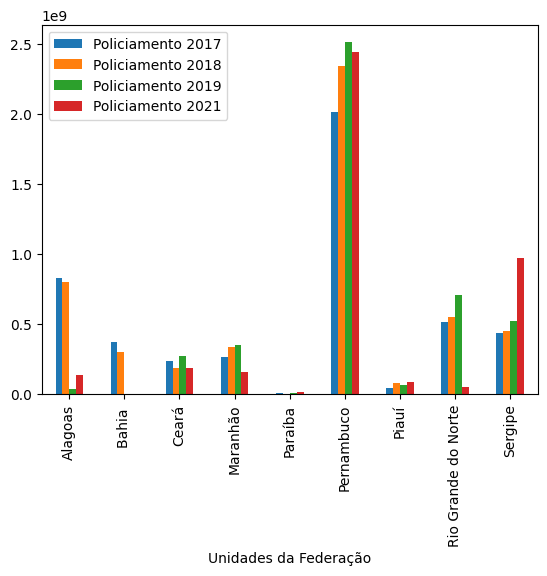

In [79]:
gastos[['Policiamento 2017',	'Policiamento 2018',	'Policiamento 2019', 'Policiamento 2021']].plot.bar()
plt.show

In [80]:
gastos_per_capita = pd.read_excel("anuario16.xlsx", sheet_name="T75")
gastos_per_capita = gastos_per_capita.drop([0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38])
gastos_per_capita

,TABELA 75,Unnamed: 1,Unnamed: 2,Unnamed: 3,(Voltar ao índice)
3,União e Unidades da Federação,2018.00,2019.00,2020.00,2021.00
10,Alagoas,427.83,410.65,444.96,419.96
13,Bahia,346.25,332.51,318.57,291.51
14,Ceará,353.05,338.39,364.86,360.99
18,Maranhão,326.01,312.50,302.98,276.86
23,Paraíba,387.30,371.15,386.26,360.96
25,Pernambuco,361.34,346.19,329.63,298.16
26,Piauí,287.32,276.54,263.57,256.12
28,Rio Grande do Norte,342.70,327.55,323.32,345.82
34,Sergipe,479.92,458.41,454.13,653.06


In [81]:
gastos_per_capita = gastos_per_capita.rename({'TABELA 75':'Unidades da Federação', 'Unnamed: 1':'2018', 'Unnamed: 2':'2019', 'Unnamed: 3':'2020', '(Voltar ao índice)':'2021'}, axis='columns')
gastos_per_capita = gastos_per_capita.drop(3)
gastos_per_capita = gastos_per_capita.set_index('Unidades da Federação')
gastos_per_capita

,2018,2019,2020,2021
Unidades da Federação,,,,
Alagoas,427.83,410.65,444.96,419.96
Bahia,346.25,332.51,318.57,291.51
Ceará,353.05,338.39,364.86,360.99
Maranhão,326.01,312.50,302.98,276.86
Paraíba,387.30,371.15,386.26,360.96
Pernambuco,361.34,346.19,329.63,298.16
Piauí,287.32,276.54,263.57,256.12
Rio Grande do Norte,342.70,327.55,323.32,345.82
Sergipe,479.92,458.41,454.13,653.06


In [82]:
gastos_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Sergipe
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    9 non-null      float64
 1   2019    9 non-null      float64
 2   2020    9 non-null      float64
 3   2021    9 non-null      float64
dtypes: float64(4)
memory usage: 360.0+ bytes


In [83]:
gastos_part = pd.read_excel("anuario16.xlsx", sheet_name="T74")
gastos_part = gastos_part.drop([0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16, 18, 19, 20, 21, 23, 26, 28, 29, 30, 31, 32, 34, 35, 36])
gastos_part

,TABELA 74,Unnamed: 1,Unnamed: 2,Unnamed: 3,(Voltar ao índice)
4,União e Unidades da Federação,2018.00,2019.00,2020.00,2021
9,Alagoas,13.59,12.83,14.09,9.67
12,Bahia,9.83,9.92,9.55,7.72
13,Ceará,10.17,10.53,11.56,10.14
17,Maranhão,9.60,11.47,11.82,9.35
22,Paraíba,12.60,13.15,14.07,11.34
24,Pernambuco,9.28,9.11,8.09,6.76
25,Piauí,7.72,7.40,6.82,5.84
27,Rio Grande do Norte,10.37,9.86,8.36,8.18
33,Sergipe,11.11,10.89,10.43,13.75


In [84]:
gastos_part = gastos_part.rename({'TABELA 74':'Unidades da Federação', 'Unnamed: 1':'2018', 'Unnamed: 2':'2019', 'Unnamed: 3':'2020', '(Voltar ao índice)':'2021'}, axis='columns')
gastos_part = gastos_part.drop(4)
gastos_part = gastos_part.set_index('Unidades da Federação')
gastos_part

,2018,2019,2020,2021
Unidades da Federação,,,,
Alagoas,13.59,12.83,14.09,9.67
Bahia,9.83,9.92,9.55,7.72
Ceará,10.17,10.53,11.56,10.14
Maranhão,9.60,11.47,11.82,9.35
Paraíba,12.60,13.15,14.07,11.34
Pernambuco,9.28,9.11,8.09,6.76
Piauí,7.72,7.40,6.82,5.84
Rio Grande do Norte,10.37,9.86,8.36,8.18
Sergipe,11.11,10.89,10.43,13.75


In [85]:
gastos_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Sergipe
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    9 non-null      float64
 1   2019    9 non-null      float64
 2   2020    9 non-null      float64
 3   2021    9 non-null      object 
dtypes: float64(3), object(1)
memory usage: 360.0+ bytes


In [86]:
gastos_part['2021'] = gastos_part['2021'].astype('float64')
gastos_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Sergipe
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    9 non-null      float64
 1   2019    9 non-null      float64
 2   2020    9 non-null      float64
 3   2021    9 non-null      float64
dtypes: float64(4)
memory usage: 360.0+ bytes


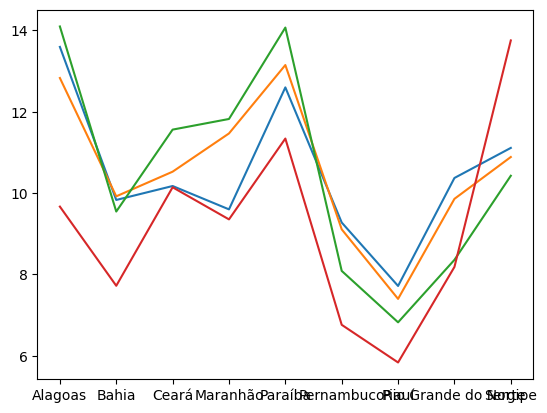

In [87]:
plt.plot(gastos_part )

In [88]:
gastos_evol = pd.read_excel("anuario16.xlsx", sheet_name="T78")
gastos_evol = gastos_evol.drop([0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])
gastos_evol = gastos_evol.drop(columns=['(Voltar ao índice)'])
gastos_evol

,TABELA 78,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
4,Regiões e UF,2018.00,2019.00,2020.00,2021.00
15,Nordeste,19192057071.25,19651418364.70,19545985283.23,19049077964.73
16,Alagoas,1355101521.04,1255388240.49,1491297889.97,1413300560.43
17,Bahia,4982988853.45,5071120550.76,4756422657.95,4368430594.62
18,Ceará,2992742459.26,3078322832.85,3351968285.49,3335783586.99
19,Maranhão,2144717589.32,2169996815.03,2155613920.94,1980444257.46
20,Paraíba,1465290626.06,1501321415.61,1560201429.04,1465463217.01
21,Pernambuco,3217893045.75,3232961892.13,3169894560.15,2884598185.52
22,Piauí,865330708.87,967454332.12,864886460.19,842460537.58
23,Rio Grande do Norte,1132549952.39,1303609818.50,1142663164.32,1231440100.44


In [89]:
gastos_evol = gastos_evol.rename({'TABELA 78':'Unidades da Federação', 'Unnamed: 1':'2018', 'Unnamed: 2':'2019', 'Unnamed: 3':'2020', 'Unnamed: 4':'2021'}, axis='columns')
gastos_evol = gastos_evol.drop(4)
gastos_evol = gastos_evol.set_index('Unidades da Federação')
gastos_evol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Nordeste to Sergipe
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    10 non-null     float64
 1   2019    10 non-null     float64
 2   2020    10 non-null     float64
 3   2021    10 non-null     float64
dtypes: float64(4)
memory usage: 400.0+ bytes


In [90]:
gastos_evol

,2018,2019,2020,2021
Unidades da Federação,,,,
Nordeste,19192057071.25,19651418364.70,19545985283.23,19049077964.73
Alagoas,1355101521.04,1255388240.49,1491297889.97,1413300560.43
Bahia,4982988853.45,5071120550.76,4756422657.95,4368430594.62
Ceará,2992742459.26,3078322832.85,3351968285.49,3335783586.99
Maranhão,2144717589.32,2169996815.03,2155613920.94,1980444257.46
Paraíba,1465290626.06,1501321415.61,1560201429.04,1465463217.01
Pernambuco,3217893045.75,3232961892.13,3169894560.15,2884598185.52
Piauí,865330708.87,967454332.12,864886460.19,842460537.58
Rio Grande do Norte,1132549952.39,1303609818.50,1142663164.32,1231440100.44


In [91]:
homicidios13 = pd.read_excel("anuario13.xlsx", sheet_name="T1")
homicidios13 = homicidios13.drop([0, 1, 2, 3, 5, 8, 9, 10, 13, 14, 16, 17, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])
homicidios13 = homicidios13.drop(columns=['TABELA 01', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', '(Voltar ao índice)'])
homicidios13['Unnamed: 1'][12] = 'Ceará'
homicidios13['Unnamed: 1'][18] = 'Paraíba'
homicidios13['Unnamed: 1'][19] = 'Pernambuco'
homicidios13['Unnamed: 1'][20] = 'Piauí'
homicidios13

<ipython-input-91-438e972624ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios13['Unnamed: 1'][12] = 'Ceará'
<ipython-input-91-438e972624ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios13['Unnamed: 1'][18] = 'Paraíba'
<ipython-input-91-438e972624ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios13['Unnamed: 1'][19] = 'Pernambuco'
<ipython-input-91-438e972624ce>:7: SettingWithCopyWarning: 
A valu

,Unnamed: 1,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
4,NaN,NaN,NaN,NaN,NaN
6,NaN,Número Absoluto,NaN,Taxa (3),NaN
7,NaN,2017 (4),2018.00,2017,2018.00
11,Alagoas,1926,1521.00,57.05,45.77
12,Ceará,5329,4788.00,59.08,52.76
15,Maranhão,2058,1776.00,29.40,25.25
18,Paraíba,1286,1210.00,31.95,30.28
19,Pernambuco,5427,4170.00,57.29,43.91
20,Piauí,653,617.00,20.28,18.90
22,Rio Grande do Norte,2355,1926.00,67.15,55.36


In [92]:
homicidios13 = homicidios13.rename({'Unnamed: 1':'Unidades da Federação', 'Unnamed: 12':'MVI 2017', 'Unnamed: 13':'MVI 2018', 'Unnamed: 14':'Taxa MVI 2017', 'Unnamed: 15':'Taxa MVI 2018'}, axis='columns')
homicidios13 = homicidios13.drop([4, 6, 7])
homicidios13 = homicidios13.set_index('Unidades da Federação')
homicidios13

,MVI 2017,MVI 2018,Taxa MVI 2017,Taxa MVI 2018
Unidades da Federação,,,,
Alagoas,1926,1521.00,57.05,45.77
Ceará,5329,4788.00,59.08,52.76
Maranhão,2058,1776.00,29.40,25.25
Paraíba,1286,1210.00,31.95,30.28
Pernambuco,5427,4170.00,57.29,43.91
Piauí,653,617.00,20.28,18.90
Rio Grande do Norte,2355,1926.00,67.15,55.36
Bahia,6979,6346.00,45.48,42.84
Sergipe,1275,1128.00,55.72,49.51


In [93]:
homicidios13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Sergipe
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MVI 2017       9 non-null      object 
 1   MVI 2018       9 non-null      float64
 2   Taxa MVI 2017  9 non-null      object 
 3   Taxa MVI 2018  9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes


In [94]:
homicidios13['MVI 2017'] = homicidios13['MVI 2017'].astype('int64')
homicidios13['MVI 2018'] = homicidios13['MVI 2018'].astype('int64')
homicidios13['Taxa MVI 2017'] = homicidios13['Taxa MVI 2017'].astype('float64')
homicidios13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Sergipe
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MVI 2017       9 non-null      int64  
 1   MVI 2018       9 non-null      int64  
 2   Taxa MVI 2017  9 non-null      float64
 3   Taxa MVI 2018  9 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 360.0+ bytes


In [95]:
homicidios15 = pd.read_excel("anuario15.xlsx", sheet_name="T02")
homicidios15 = homicidios15.drop([0, 1, 2, 5, 8, 9, 10, 13, 14, 15, 17, 18, 20, 23, 25, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])
homicidios15 = homicidios15.drop(columns=['TABELA 02', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', '(Voltar ao índice)'])
homicidios15['Unnamed: 1'][11] = 'Alagoas'
homicidios15['Unnamed: 1'][19] = 'Paraíba'
homicidios15['Unnamed: 1'][21] = 'Pernambuco'
homicidios15['Unnamed: 1'][22] = 'Piauí'
homicidios15['Unnamed: 1'][30] = 'Rio Grande do Norte'
homicidios15

<ipython-input-95-3a1c95e863a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios15['Unnamed: 1'][11] = 'Alagoas'
<ipython-input-95-3a1c95e863a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios15['Unnamed: 1'][19] = 'Paraíba'
<ipython-input-95-3a1c95e863a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios15['Unnamed: 1'][21] = 'Pernambuco'
<ipython-input-95-3a1c95e863a0>:7: SettingWithCopyWarning: 
A va

,Unnamed: 1,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
3,Brasil e Unidades da Federação,Mortes Violentas Intencionais - MVI,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
6,NaN,Número Absoluto,NaN,Taxa (3),NaN
7,NaN,2019 (4),2020.00,2019,2020.00
11,Alagoas,1095,1251.00,32.81,37.33
12,Ceará,2359,4155.00,25.83,45.23
16,Maranhão,1562,2045.00,22.08,28.74
19,Paraíba,942,1166.00,23.44,28.87
21,Pernambuco,3412,3681.00,35.70,38.28
22,Piauí,587,707.00,17.93,21.55


In [96]:
homicidios15 = homicidios15.rename({'Unnamed: 1':'Unidades da Federação', 'Unnamed: 12':'MVI 2019', 'Unnamed: 13':'MVI 2020', 'Unnamed: 14':'Taxa MVI 2019', 'Unnamed: 15':'Taxa MVI 2020'}, axis='columns')
homicidios15 = homicidios15.drop([3, 4, 6, 7])
homicidios15 = homicidios15.set_index('Unidades da Federação')
homicidios15

,MVI 2019,MVI 2020,Taxa MVI 2019,Taxa MVI 2020
Unidades da Federação,,,,
Alagoas,1095,1251.00,32.81,37.33
Ceará,2359,4155.00,25.83,45.23
Maranhão,1562,2045.00,22.08,28.74
Paraíba,942,1166.00,23.44,28.87
Pernambuco,3412,3681.00,35.70,38.28
Piauí,587,707.00,17.93,21.55
Sergipe,967,987.00,42.07,42.56
Bahia,6002,6703.00,40.35,44.89
Rio Grande do Norte,1264,1344.00,36.04,38.03


In [97]:
homicidios15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Rio Grande do Norte
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MVI 2019       9 non-null      object 
 1   MVI 2020       9 non-null      float64
 2   Taxa MVI 2019  9 non-null      object 
 3   Taxa MVI 2020  9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes


In [98]:
homicidios15['MVI 2019'] = homicidios15['MVI 2019'].astype('int64')
homicidios15['MVI 2020'] = homicidios15['MVI 2020'].astype('int64')
homicidios15['Taxa MVI 2019'] = homicidios15['Taxa MVI 2019'].astype('float64')
homicidios15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Rio Grande do Norte
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MVI 2019       9 non-null      int64  
 1   MVI 2020       9 non-null      int64  
 2   Taxa MVI 2019  9 non-null      float64
 3   Taxa MVI 2020  9 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 360.0+ bytes


In [99]:
homicidios16 = pd.read_excel("anuario16.xlsx", sheet_name="T02")
homicidios16 = homicidios16.drop([0, 1, 2, 3, 4, 5, 8, 9, 10, 13, 14, 15, 17, 18, 20, 23, 25, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])
homicidios16 = homicidios16.drop(columns=['TABELA 02', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 14', '(Voltar ao índice)'])
homicidios16['Unnamed: 1'][22] = 'Piauí'
homicidios16['Unnamed: 1'][11] = 'Alagoas'
homicidios16['Unnamed: 1'][19] = 'Paraíba'
homicidios16['Unnamed: 1'][21] = 'Pernambuco'
homicidios16['Unnamed: 1'][30] = 'Rio Grande do Norte'
homicidios16

<ipython-input-99-7329e8db3deb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios16['Unnamed: 1'][22] = 'Piauí'
<ipython-input-99-7329e8db3deb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios16['Unnamed: 1'][11] = 'Alagoas'
<ipython-input-99-7329e8db3deb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios16['Unnamed: 1'][19] = 'Paraíba'
<ipython-input-99-7329e8db3deb>:7: SettingWithCopyWarning: 
A value i

,Unnamed: 1,Unnamed: 13,Unnamed: 15
6,NaN,NaN,NaN
7,NaN,2021.00,2021.00
11,Alagoas,1069.00,31.76
12,Ceará,3418.00,36.99
16,Maranhão,2021.00,28.25
19,Paraíba,1161.00,28.60
21,Pernambuco,3368.00,34.81
22,Piauí,782.00,23.77
24,Sergipe,792.00,33.87
26,Bahia,6734.00,44.94


In [100]:
homicidios16 = homicidios16.rename({'Unnamed: 1':'Unidades da Federação', 'Unnamed: 13':'MVI 2021', 'Unnamed: 15':'Taxa MVI 2021'}, axis='columns')
homicidios16 = homicidios16.drop([6, 7])
homicidios16 = homicidios16.set_index('Unidades da Federação')
homicidios16

,MVI 2021,Taxa MVI 2021
Unidades da Federação,,
Alagoas,1069.00,31.76
Ceará,3418.00,36.99
Maranhão,2021.00,28.25
Paraíba,1161.00,28.60
Pernambuco,3368.00,34.81
Piauí,782.00,23.77
Sergipe,792.00,33.87
Bahia,6734.00,44.94
Rio Grande do Norte,1155.00,32.44


In [101]:
homicidios16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Rio Grande do Norte
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MVI 2021       9 non-null      float64
 1   Taxa MVI 2021  9 non-null      float64
dtypes: float64(2)
memory usage: 216.0+ bytes


In [102]:
homicidios16['MVI 2021'] = homicidios16['MVI 2021'].astype('int64')
homicidios16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Alagoas to Rio Grande do Norte
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MVI 2021       9 non-null      int64  
 1   Taxa MVI 2021  9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 216.0+ bytes


In [103]:
homicidios13_15 = pd.merge(homicidios13, homicidios15, how='left', on='Unidades da Federação')
homicidios13_15

,MVI 2017,MVI 2018,Taxa MVI 2017,Taxa MVI 2018,MVI 2019,MVI 2020,Taxa MVI 2019,Taxa MVI 2020
Unidades da Federação,,,,,,,,
Alagoas,1926,1521,57.05,45.77,1095,1251,32.81,37.33
Ceará,5329,4788,59.08,52.76,2359,4155,25.83,45.23
Maranhão,2058,1776,29.40,25.25,1562,2045,22.08,28.74
Paraíba,1286,1210,31.95,30.28,942,1166,23.44,28.87
Pernambuco,5427,4170,57.29,43.91,3412,3681,35.70,38.28
Piauí,653,617,20.28,18.90,587,707,17.93,21.55
Rio Grande do Norte,2355,1926,67.15,55.36,1264,1344,36.04,38.03
Bahia,6979,6346,45.48,42.84,6002,6703,40.35,44.89
Sergipe,1275,1128,55.72,49.51,967,987,42.07,42.56


In [104]:
homicidios = pd.merge(homicidios13_15, homicidios16, how='left', on='Unidades da Federação')
homicidios

,MVI 2017,MVI 2018,Taxa MVI 2017,Taxa MVI 2018,MVI 2019,MVI 2020,Taxa MVI 2019,Taxa MVI 2020,MVI 2021,Taxa MVI 2021
Unidades da Federação,,,,,,,,,,
Alagoas,1926,1521,57.05,45.77,1095,1251,32.81,37.33,1069,31.76
Ceará,5329,4788,59.08,52.76,2359,4155,25.83,45.23,3418,36.99
Maranhão,2058,1776,29.40,25.25,1562,2045,22.08,28.74,2021,28.25
Paraíba,1286,1210,31.95,30.28,942,1166,23.44,28.87,1161,28.60
Pernambuco,5427,4170,57.29,43.91,3412,3681,35.70,38.28,3368,34.81
Piauí,653,617,20.28,18.90,587,707,17.93,21.55,782,23.77
Rio Grande do Norte,2355,1926,67.15,55.36,1264,1344,36.04,38.03,1155,32.44
Bahia,6979,6346,45.48,42.84,6002,6703,40.35,44.89,6734,44.94
Sergipe,1275,1128,55.72,49.51,967,987,42.07,42.56,792,33.87


teste